In [1]:
import numpy as nm
import matplotlib.pyplot as mtp 
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
data_set= pd.read_csv('user_data.csv') 

x= data_set.iloc[:, [2,3]].values 
y= data_set.iloc[:, 4].values

In [3]:
data_set

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=42)


In [5]:
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train) 
x_test= st_x.transform(x_test)

In [6]:
# Define the model
classifier = KNeighborsClassifier()

In [7]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],  # Different values for k
    'metric': ['minkowski', 'euclidean', 'manhattan'],  # Distance metrics
    'p': [1, 2]  # Only used for 'minkowski' metric
}

In [8]:
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Use accuracy as the evaluation metric
    n_jobs=-1,  # Utilize all processors
    verbose=1
)

In [9]:
# Fit the grid search to your training data
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'p': [1, 2]},
             scoring='accuracy', verbose=1)

In [10]:

# Print the best parameters and the corresponding accuracy score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)



Best Parameters: {'metric': 'minkowski', 'n_neighbors': 9, 'p': 1}
Best Accuracy Score: 0.9033333333333333


In [11]:
# Use the best estimator for predictions
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(x_test)

In [12]:
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[58  5]
 [ 1 36]]


In [13]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.94


In [14]:
classification_report_=classification_report(y_test,y_pred)
print(classification_report_)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        63
           1       0.88      0.97      0.92        37

    accuracy                           0.94       100
   macro avg       0.93      0.95      0.94       100
weighted avg       0.94      0.94      0.94       100



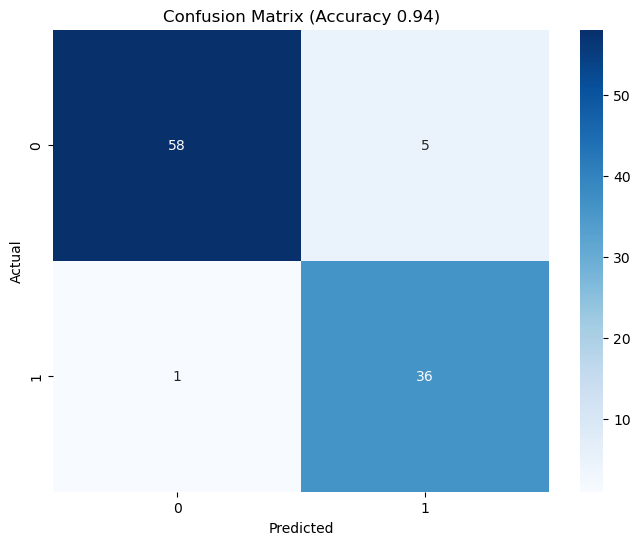

In [15]:
mtp.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=True)
# Add labels, title, and adjust layout
mtp.xlabel('Predicted')
mtp.ylabel('Actual')
mtp.title(f'Confusion Matrix (Accuracy {accuracy})')
mtp.show()

In [16]:
from matplotlib.colors import ListedColormap 
x_set, y_set = x_train, y_train 
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step
=0.01),nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01)) 
mtp.contourf(x1,x2,classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red','green' ))) 
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)): 
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],c = ListedColormap(('red', 'green'))(i), label = j) 
mtp.title('K-NN Algorithm (Training set)') 
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary') 
mtp.legend()
mtp.show()

from matplotlib.colors import ListedColormap 
x_set, y_set = x_test, y_test 
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step
=0.01),nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01)) 
mtp.contourf(x1,x2,classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red','green' ))) 
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)): 
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],c = ListedColormap(('red', 'green'))(i), label = j) 
mtp.title('K-NN algorithm(Test set)') 
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary') 
mtp.legend()
mtp.show()

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.